In [74]:
######################################################################################
#  conda install -c https://conda.anaconda.org/omnia pyhmc
######################################################################################

# define your probability distribution
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

def flash1D(t, a): # One dimensional ideal model (an instantaneous heat pulse, no heat losses)
    suma =0.0
    for n in range(1, 50):
        suma = suma + (-1)**n*np.exp(-((n*np.pi)**2*a*t))
    return (1+2.0*suma)
def gflash1D(t, a): # One dimensional ideal model (an instantaneous heat pulse, no heat losses)
    grads =0.0
    for n in range(1, 50):
        grads += (-1)**(n+1)*((n*np.pi)**2*t)*np.exp(-((n*np.pi)**2*a*t))
    return (grads)


def logprob(x, ivar):
#    logp = -0.5 * np.sum(ivar * x**2)
#    grad = -ivar * x
    # ivar = [Tmax, alpha]
    logp = np.log(ivar[0]*flash1D(x,ivar[1]))
    grad = np.asarray([flash1D(x,ivar[1]), ivar[0]*gflash1D(x,ivar[1])])   
    return logp, np.log(grad)

# run the sampler
from pyhmc import hmc
ivar = [2.0, 1.0]
ivar = np.asfarray(ivar)
x00 = np.asfarray([0.01,-0.1])
samples = hmc(logprob, x0=x00, args=(ivar,), n_samples=1e4, display=1)
# Optionally, plot the results (requires an external package)
import triangle  # pip install triangle_plot
plt.plot(samples)
triangle.corner(samples)
#figure = triangle.corner(samples)
#figure.savefig('triangle.png')

TypeError: only length-1 arrays can be converted to Python scalars

In [66]:
ivar
#np.random.rand(5)

array([ 2.,  1.])

In [69]:
logprob(np.linspace(0.01,1.,10),ivar)

(array([-21.88348632,  -0.20927209,   0.46197818,   0.62082449,
          0.66930452,   0.68515938,   0.69045699,   0.69223957,
          0.69284079,   0.69304373]),
 array([[ -2.25766335e+01,  -9.02419270e-01,  -2.31169001e-01,
          -7.23226905e-02,  -2.38426618e-02,  -7.98779836e-03,
          -2.69019129e-03,  -9.07614817e-04,  -3.06391291e-04,
          -1.03451723e-04],
        [ -1.93779595e+01,  -4.42886332e-01,  -7.61498321e-01,
          -1.45203805e+00,  -2.25722926e+00,  -3.12419026e+00,
          -4.03050557e+00,  -4.96414584e+00,  -5.91787478e+00,
          -6.88699745e+00]]))

([array([    7.,    43.,   253.,  1052.,  2317.,  2478.,  1992.,  1257.,
           533.,    68.]),
  array([  1.00000000e+00,   1.00000000e+01,   8.00000000e+01,
           5.98000000e+02,   1.50100000e+03,   2.99700000e+03,
           3.06600000e+03,   1.37200000e+03,   3.40000000e+02,
           3.50000000e+01]),
  array([    0.,     0.,    27.,   375.,  1296.,  3055.,  3151.,  1667.,
           408.,    21.]),
  array([   22.,    80.,   303.,   797.,  1781.,  2698.,  2500.,  1206.,
           503.,   110.]),
  array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           2.00000000e+00,   6.22000000e+02,   5.68800000e+03,
           3.54400000e+03,   1.44000000e+02,   0.00000000e+00,
           0.00000000e+00])],
 array([-4.08962064, -3.38643547, -2.6832503 , -1.98006512, -1.27687995,
        -0.57369478,  0.1294904 ,  0.83267557,  1.53586075,  2.23904592,
         2.94223109]),
 <a list of 5 Lists of Patches objects>)

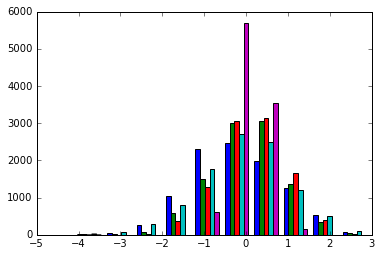

In [3]:
plt.hist(samples)

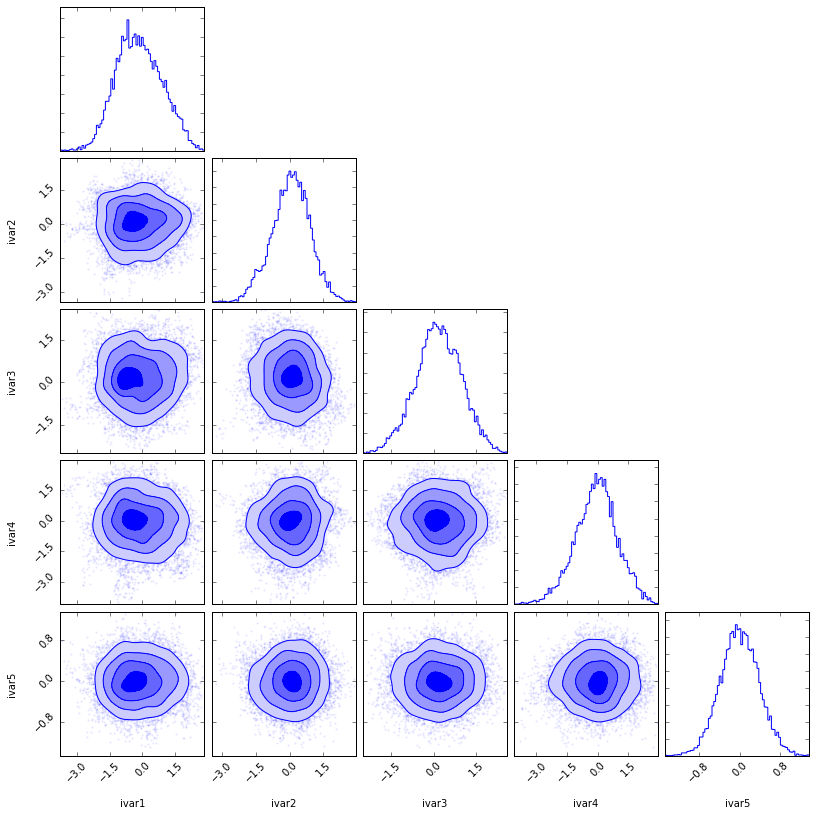

In [4]:
import corner
figure = corner.corner(samples, color="b", bins=80, filled= True, smooth=(3),fill_contours=True,
                       labels=['ivar1','ivar2','ivar3','ivar4','ivar5']) #, 
                #truths=[alpha_true, beta_x_true, beta_y_true, eps_true])

In [72]:
hmc?


In [21]:
def flash1D(t, a): # One dimensional ideal model (an instantaneous heat pulse, no heat losses)
    suma =0.0
    for n in range(1, 50):
        suma = suma + (-1)**n*np.exp(-((n*np.pi)**2*a*t))
    return (1+2.0*suma)
def gflash1D(t, a): # One dimensional ideal model (an instantaneous heat pulse, no heat losses)
    grads =0.0
    for n in range(1, 50):
        grads += (-1)**(n+1)*((n*np.pi)**2*t)*np.exp(-((n*np.pi)**2*a*t))
    return (grads)

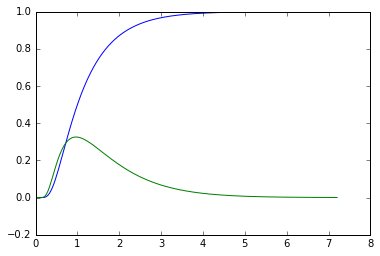

In [29]:
N=200 # number of experimental points
time = np.linspace(0.001,1.,N) # define time points
temper = 1*flash1D(time, 1)
gtemper= 1*gflash1D(time, 1)
plt.plot(time/0.1388, temper, time/0.1388, gtemper);

In [47]:
ivar

[2.0, 1.0]

In [49]:
np.asarray(ivar)

array([ 2.,  1.])